在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。
为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。内接多边形的等长边越多，就越接近圆。这个过程也被称为 *逼近法*（method of exhaustion）。

事实上，逼近法就是 *积分*（integral calculus）的起源。2000 多年后，微积分的另一支，*微分*（differential calculus），被发明出来。在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。通常情况下，变得更好意味着最小化一个 *损失函数*（loss function），即一个衡量“我们的模型有多糟糕”这个问题的分数。这个问题比看上去要微妙得多。最终，我们真正关心的是生成一个能够在我们从未见过的数据上表现良好的模型。但我们只能将模型与我们实际能看到的数据相拟合。因此，我们可以将拟合模型的任务分解为两个关键问题：（1）*优化*（optimization）：用模型拟合观测数据的过程；（2）*泛化*（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

为了帮助你在后面的章节中更好地理解优化问题和方法，这里我们对深度学习中常用的微分知识提供了一个非常简短的入门教程。

# 导数和微分

我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。在深度学习中，我们通常选择对于模型参数可微的损失函数。简而言之，这意味着，对于每个参数，
如果我们把这个参数*增加*或*减少*一个无穷小的量，我们可以知道损失会以多快的速度增加或减少，

假设我们有一个函数 $f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。(**$f$ 的 *导数* 被定义为**)

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}, \tag{1.1} \label{eq1.1} $$**)


如果这个极限存在。如果$f'(a)$存在，则称$f$在$a$处是*可微*（differentiable）的。如果 $f$ 在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。我们可以将 $\eqref{eq1.1}$ 中的导数 $f'(x)$ 解释为$f(x)$相对于 $x$ 的 *瞬时*（instantaneous） 变化率。所谓的瞬时变化率是基于$x$中的变化$h$，且$h$接近$0$。

为了更好地解释导数，让我们用一个例子来做实验。
(**定义$u = f(x) = 3x^2-4x$.**)


In [1]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**通过令 $x=1$ 并让 $h$ 接近 $0$，**] (1.1)中(**$\frac{f(x+h) - f(x)}{h}$ 的数值结果接近 $2$**)。虽然这个实验不是一个数学证明，但我们稍后会看到，当 $x=1$时，导数 $u'$是 $2$ 。


In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


让我们熟悉一下导数的几个等价符号。
给定 $y = f(x)$，其中 $x$ 和 $y$ 分别是函数 $f$ 的自变量和因变量。以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号 $\frac{d}{dx}$ 和 $D$ 是*微分运算符*，表示*微分*操作。我们可以使用以下规则来对常见函数求微分：

* $DC = 0$ （$C$ 是一个常数）
* $Dx^n = nx^{n-1}$ （*幂律*（power rule）, $n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

为了微分一个由一些简单函数（如上面的常见函数）组成的函数，下面的法则使用起来很方便。
假设函数$f$和$g$都是可微的，$C$是一个常数，我们有：

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

现在我们可以应用上述几个法则来计算 $u' = f'(x) = 3 \frac{d}{dx} x^2-4\frac{d}{dx}x = 6x-4$。因此，通过令 $x = 1$ ，我们有 $u' = 2$ ：这一点得到了我们在本节前面的实验的支持，在这个实验中，数值结果接近$2$。当 $x=1$ 时，此导数也是曲线 $u = f(x)$ 切线的斜率。

[**为了对导数的这种解释进行可视化，**]我们将使用 `matplotlib`，这是一个Python中流行的绘图库。要配置`matplotlib`生成图形的属性，我们需要(**定义几个函数**)。
在下面，`use_svg_display` 函数指定 `matplotlib` 软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是一个特殊的标记，会将对应的函数、类或语句保存在`d2l`包中
因此，以后无需重新定义就可以直接调用它们（例如，`d2l.use_svg_display()`）。

In [4]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图。"""
    display.set_matplotlib_formats('svg')

我们定义 `set_figsize` 函数来设置图表大小。注意，这里我们直接使用 `d2l.plt`，因为导入语句 `from matplotlib import pyplot as plt` 已在前言中标记为保存到`d2l` 包中。


In [5]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小。"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的set_axes函数用于设置由matplotlib生成图表的轴的属性

In [6]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，我们定义了 `plot` 函数来简洁地绘制多条曲线.

In [7]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数 $u = f(x)$ 及其在 $x=1$ 处的切线 $y = 2x - 3$**]，其中系数$2$是切线的斜率。

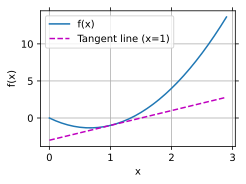

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 偏导数

到目前为止，我们只讨论了仅含一个变量的函数的微分。在深度学习中，函数通常依赖于许多变量。因此，我们需要将微分的思想推广到这些 *多元函数* （multivariate function）上。

设 $y = f(x_1, x_2, \ldots, x_n)$ 是一个具有 $n$ 个变量的函数。$y$ 关于第$i$ 个参数$x_i$的*偏导数*（partial derivative）为：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算 $\frac{\partial y}{\partial x_i}$，我们可以简单地将 $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ 看作常数，并计算 $y$关于$x_i$ 的导数。对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

# 梯度

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的*梯度*（gradient）向量。设函数 $f: \mathbb{R}^n \rightarrow \mathbb{R}$ 的输入是一个 $n$ 维向量 $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中 $\nabla_{\mathbf{x}} f(\mathbf{x})$ 通常在没有歧义时被 $\nabla f(\mathbf{x})$ 取代。

假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵 $\mathbf{X}$，我们都有 $\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

# 链式法则

然而，上面方法可能很难找到梯度。
这是因为在深度学习中，多元函数通常是 *复合*（composite）的，所以我们可能没法应用上述任何规则来微分这些函数。
幸运的是，链式法则使我们能够微分复合函数。

让我们先考虑单变量函数。假设函数 $y=f(u)$ 和 $u=g(x)$ 都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

现在让我们把注意力转向一个更一般的场景，即函数具有任意数量的变量的情况。假设可微分函数 $y$ 有变量 $u_1, u_2, \ldots, u_m$，其中每个可微分函数 $u_i$ 都有变量 $x_1, x_2, \ldots, x_n$。注意，$y$是 $x_1, x_2， \ldots, x_n$ 的函数。对于任意 $i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$

# 小结

* 微分和积分是微积分的两个分支，其中前者可以应用于深度学习中无处不在的优化问题。
* 导数可以被解释为函数相对于其变量的瞬时变化率。它也是函数曲线的切线的斜率。
* 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。
* 链式法则使我们能够微分复合函数。

# 练习

1. 绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。
1. 求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。
1. 函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？
1. 你可以写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则吗?

<ipython-input-13-229172dbfb03>:3: RuntimeWarning: divide by zero encountered in true_divide
  return x**3 - 1 / x


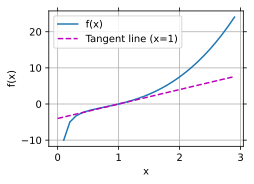

In [13]:
#p1 f(x) = x^3 - 1/x   Df(x) = 3x^2 + 1 / x^2 Df(1)=4 y=4x-4
def f1(x):
    return x**3 - 1 / x

x = np.arange(0, 3, 0.1)
plot(x, [f1(x), 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

P2 
$f(x_{1}, x_{2}) = 3x_{1}^{2} + 5e^{x_{2}}$ 

$ D_{x_{1}}f(x) = 6x_{1}$ 

$D_{x_{2}}f(x) = 5e^{x_{2}}$


<ipython-input-20-dd4b5d7e6973>:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


AttributeError: 'function' object has no attribute 'ndim'

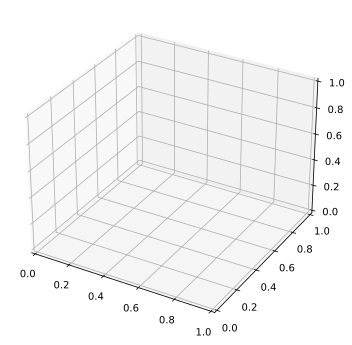

In [20]:
# p2
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
def f_x1_x2(x1, x2):
    return 3 * x1 ** 2 + 5 * np.exp(x2)
def f_grad(x1, x2):
    d_x1 = 6 * x1
    d_x2 = 5 * np.exp(x2)
    grad = (d_x1, d_x2)
    return grad
x1 = np.arange(0, 3.0, 0.1)
x2 = np.arange(0, 3.0,0.1))

<ipython-input-21-7140d8686646>:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


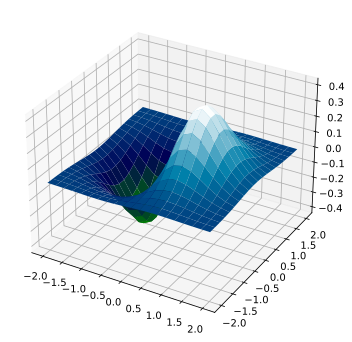

In [21]:
import numpy as np
import mpl_toolkits.mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm

x,y = np.mgrid[-2:2:20j,-2:2:20j]
z = x * np.exp(- x**2 - y**2)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z,cmap=cm.ocean)
plt.show()